# Loan prediction 

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [65]:
train_df= pd.read_csv('train_ctrUa4K.csv')
test_df=pd.read_csv('test_lAUu6dG.csv')

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
train_df=train_df.drop('Loan_ID', axis=1)


KeyError: "['Loan_ID'] not found in axis"

In [70]:
test_df=test_df.drop('Loan_ID', axis=1)

In [71]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)


In [75]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
X=train_df.drop('Loan_Status',1)
y=train_df.Loan_Status

In [80]:
X.shape

(614, 11)

In [81]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [82]:
train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


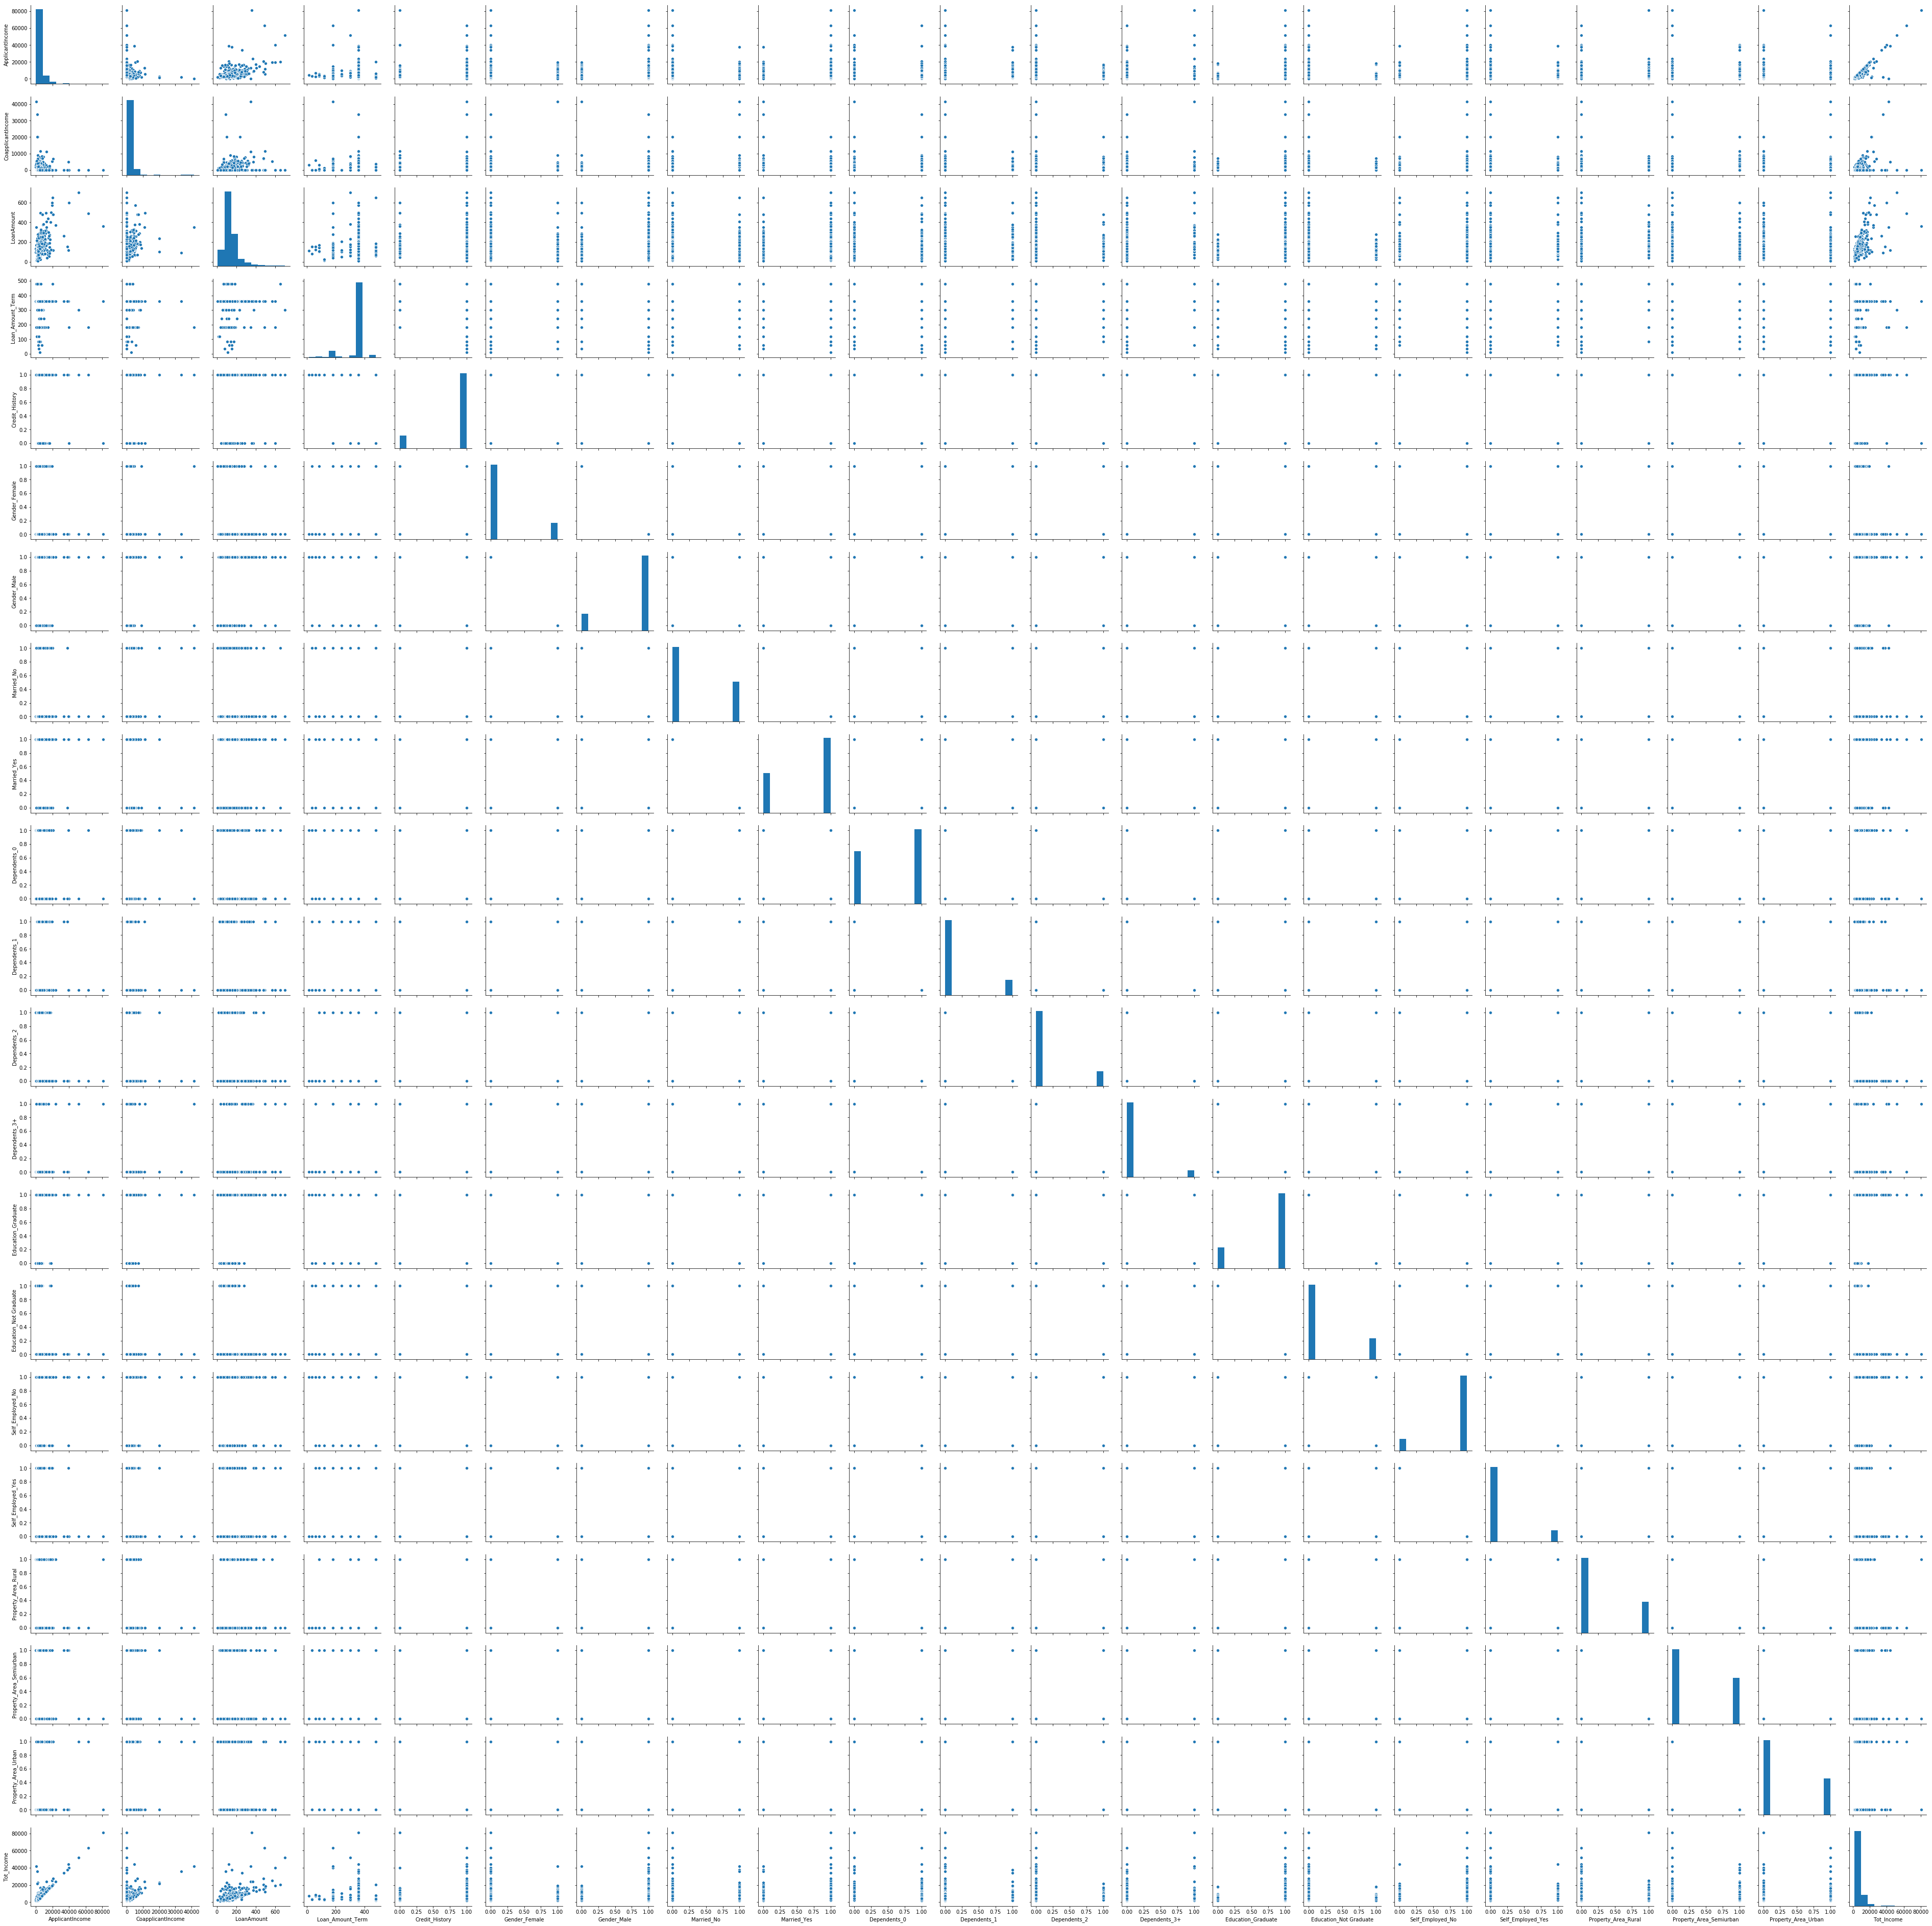

In [198]:
sns.pairplot(train_df)

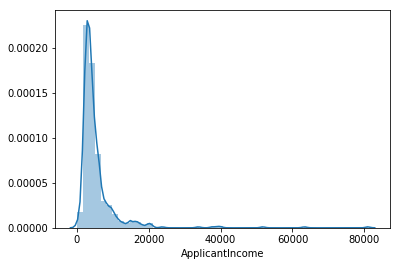

In [90]:
sns.distplot(train_df['ApplicantIncome'])

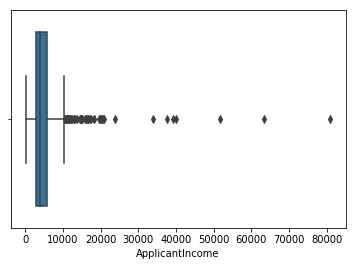

In [97]:
sns.boxplot(train_df['ApplicantIncome'])

In [98]:
train_df['Tot_Income'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [99]:
train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Tot_Income
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,0,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,6091.0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,0,1,3000.0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,0,1,4941.0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,0,1,6000.0


In [109]:
train_df=train_df.drop('Loan_Status_N',1)

In [110]:
train_df=train_df.drop('Loan_Status_Y',1)

In [114]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,NaN,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


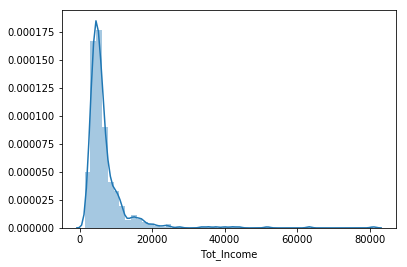

In [102]:
sns.distplot(train_df['Tot_Income'])

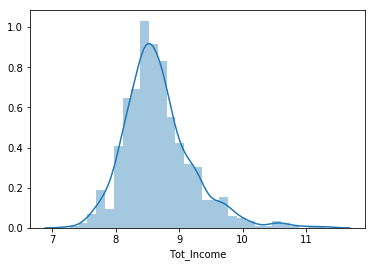

In [103]:
import numpy as np
sns.distplot(np.log(train_df['Tot_Income']))

In [94]:
sns.jointplot(x='train_df', y = train_df['Loan_Status'])

KeyError: 'Loan_Status'

In [111]:
train_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Tot_Income
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.058809,0.058809,-0.051708,0.051708,-0.092599,...,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598,0.893037
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.082912,0.082912,-0.075948,0.075948,-0.008292,...,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776,0.342781
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.106404,0.106404,-0.146212,0.146212,-0.147542,...,0.020367,0.152619,0.169436,-0.169436,-0.114971,0.114971,0.043570,-0.004730,-0.037259,0.620088
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,0.074030,-0.074030,0.100912,-0.100912,0.118163,...,-0.010609,-0.077273,0.073928,-0.073928,0.033739,-0.033739,0.034321,0.059141,-0.094279,-0.070917
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,-0.009170,0.009170,-0.010938,0.010938,0.020500,...,0.007987,-0.060473,0.073658,-0.073658,0.001550,-0.001550,-0.020906,0.035976,-0.016934,-0.012563
Gender_Female,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,1.000000,-1.000000,0.364569,-0.364569,0.148421,...,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,-0.080283,0.108623,-0.034530,-0.093191
Gender_Male,0.058809,0.082912,0.106404,-0.074030,0.009170,-1.000000,1.000000,-0.364569,0.364569,-0.148421,...,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,0.080283,-0.108623,0.034530,0.093191
Married_No,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,0.364569,-0.364569,1.000000,-1.000000,0.348175,...,-0.249547,-0.132566,0.012304,-0.012304,0.004489,-0.004489,0.006805,-0.005845,-0.000546,-0.083319
Married_Yes,0.051708,0.075948,0.146212,-0.100912,0.010938,-0.364569,0.364569,-1.000000,1.000000,-0.348175,...,0.249547,0.132566,-0.012304,0.012304,-0.004489,0.004489,-0.006805,0.005845,0.000546,0.083319
Dependents_0,-0.092599,-0.008292,-0.147542,0.118163,0.020500,0.148421,-0.148421,0.348175,-0.348175,1.000000,...,-0.528246,-0.358315,0.036563,-0.036563,0.088254,-0.088254,0.044015,-0.004173,-0.038264,-0.091343


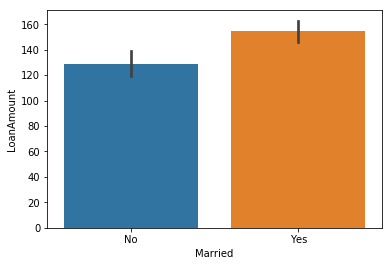

In [55]:
sns.barplot(x='Married', y='LoanAmount', data=train_df)

In [125]:
y.head()
y = y.values.ravel()

In [138]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=600, random_state=50)
print("Training model.")
#train model
model.fit(X_train,y_train)
predicted_labels = model.predict(X_test)


Training model.


In [136]:
X = train_df

In [143]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Tot_Income
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,6091.0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,3000.0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,4941.0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,6000.0


In [192]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predicted_labels))
print('--------------------------------')
print(classification_report(y_test,predicted_labels))
print('--------------------------------')
print('Accuracy for RF Classifier:',accuracy_score(y_test, predicted_labels))


[[14 19]
 [ 7 83]]
--------------------------------
              precision    recall  f1-score   support

           N       0.67      0.42      0.52        33
           Y       0.81      0.92      0.86        90

   micro avg       0.79      0.79      0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123

--------------------------------
Accuracy for RF Classifier: 0.7886178861788617


In [169]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [167]:
print('Accuracy for SVM:', accuracy_score(y_test, y_pred_svm)*100, '%')

Accuracy for SVM: 79.67479674796748 %


In [193]:

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=600, random_state=50),
    MLPClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='linear', C=1.0)
    
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.7886178861788617
0.7317073170731707
0.7723577235772358
0.5934959349593496
0.7967479674796748


In [194]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


#### Support Vector Machine provides the best accuracy so far is 79.6%


Further, need to try Boosting and bagging algorithm like LGB and XGBoost and Hyperprameter tuning to improve accuracy.
Will update the notebook soon.
